<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/HW7/autoencoder_time_series_instructions_MLTSA25_RWolynetz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder for time series
an autoencoder is a deep neural network that reproduces input data

it does so by progressively shrinking the size of the layers from the input size to a bottle neck and then expanding them back progressively to the initial size

note: the input and target are the same!

put your imports in the top cell

In [1]:
!pip install PyGithub
!pip install pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 10.2 MB/s eta 0:00:00


In [99]:
import pandas as pd
import numpy as np
import glob
import pylab as pl
from PIL import Image
from github import Github
import sys
import os
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
#Deep leaarning imports
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint


get the data by cloaning the repo https://github.com/nlandolfi/acc2022treelinearcascades_stocks.git

In [3]:

from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
cd gdrive/My\ Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework\ 7

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 7


In [61]:
mkdir data

In [5]:
cd data

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 7/data


In [10]:
cd data

/content/gdrive/My Drive/Graduate School/Graduate Year 2/Spring 2025/My Courses/PHYS 664: Machine Learning for Time Series Analysis/Python Notebooks/Homework/Homework 7/data/data


In [6]:
# First create a Github instance:
# we do not need to use username and password because we will access a public repo
g = Github()
guser = g.get_user("nlandolfi") #Get the user
repo = guser.get_repo("acc2022treelinearcascades_stocks") #Get the repo

In [7]:
#These are stock price time series. Use the " Volume" column as your chosen time series
stockPrices = repo.get_contents("data")
stockPrices

[ContentFile(path="data/aapl.csv"),
 ContentFile(path="data/amgn.csv"),
 ContentFile(path="data/axp.csv"),
 ContentFile(path="data/ba.csv"),
 ContentFile(path="data/cat.csv"),
 ContentFile(path="data/crm.csv"),
 ContentFile(path="data/csco.csv"),
 ContentFile(path="data/cvx.csv"),
 ContentFile(path="data/dis.csv"),
 ContentFile(path="data/dow.csv"),
 ContentFile(path="data/gs.csv"),
 ContentFile(path="data/hd.csv"),
 ContentFile(path="data/hon.csv"),
 ContentFile(path="data/ibm.csv"),
 ContentFile(path="data/intc.csv"),
 ContentFile(path="data/jnj.csv"),
 ContentFile(path="data/jpm.csv"),
 ContentFile(path="data/ko.csv"),
 ContentFile(path="data/mcd.csv"),
 ContentFile(path="data/mmm.csv"),
 ContentFile(path="data/mrk.csv"),
 ContentFile(path="data/msft.csv"),
 ContentFile(path="data/nke.csv"),
 ContentFile(path="data/pg.csv"),
 ContentFile(path="data/trv.csv"),
 ContentFile(path="data/unh.csv"),
 ContentFile(path="data/v.csv"),
 ContentFile(path="data/vz.csv"),
 ContentFile(path="data

In [65]:
# prompt: Get the Stock Prices datasets into my data folder

import os

# Create the data directory if it doesn't exist
if not os.path.exists("data"):
    os.makedirs("data")

# Download each file from the repository
for file in stockPrices:
    file_path = os.path.join("data", file.name)
    if not os.path.exists(file_path):
        file_content = repo.get_contents(file.path).decoded_content
        with open(file_path, "wb") as f:
            f.write(file_content)


check that all files have the same length. The system command `wc -l returns` the  number of lines (stands for "word count -lines")

In [72]:
# prompt: check that all files have the same length using the system command wc -l to access the files in the current directory. do it in one line

!wc -l * | awk '{print $1}' | sort | uniq -d


2516


In [11]:
!wc -l * #They all have the same length, except dow

   2516 aapl.csv
   2516 amgn.csv
   2516 axp.csv
   2516 ba.csv
   2516 cat.csv
   2516 crm.csv
   2516 csco.csv
   2516 cvx.csv
   2516 dis.csv
    542 dow.csv
   2516 gs.csv
   2516 hd.csv
   2516 hon.csv
   2516 ibm.csv
   2516 intc.csv
   2516 jnj.csv
   2516 jpm.csv
   2516 ko.csv
   2516 mcd.csv
   2516 mmm.csv
   2516 mrk.csv
   2516 msft.csv
   2516 nke.csv
   2516 pg.csv
   2516 trv.csv
   2516 unh.csv
   2516 v.csv
   2516 vz.csv
   2516 wba.csv
   2516 wmt.csv
  73506 total


In [33]:
#create a list of all files you want to load
files = glob.glob("*") #Changed the path since we are in the current directory.
files

['aapl.csv',
 'amgn.csv',
 'axp.csv',
 'ba.csv',
 'cat.csv',
 'crm.csv',
 'csco.csv',
 'cvx.csv',
 'dis.csv',
 'dow.csv',
 'gs.csv',
 'hd.csv',
 'hon.csv',
 'ibm.csv',
 'intc.csv',
 'jnj.csv',
 'jpm.csv',
 'ko.csv',
 'mcd.csv',
 'mmm.csv',
 'mrk.csv',
 'msft.csv',
 'nke.csv',
 'pg.csv',
 'trv.csv',
 'unh.csv',
 'v.csv',
 'vz.csv',
 'wba.csv',
 'wmt.csv']

In [86]:
pd.read_csv(files[9]).shape[0]

542

In [13]:
numLines = len(open(files[0]).readlines()) #Changed the path since we are in the current directory.
numLines

2517

In [80]:
#create a numpy array to host the data
data = np.zeros((numLines-1,len(files))) # Corrected: Pass shape as a tuple # do not use hard coded numbers, use values calculated on the spot from the variables you have: the number of and shape of the files
data.shape

(2516, 30)

 read in all the data into the array

In [28]:
df = pd.read_csv(files[0])
df.head()
df.columns #There is whitespace before each column name.
df.shape[0]

2516

In [21]:
pd.read_csv(files[0]).loc[:, " Volume"]

,Volume
0,1.121723e+08
1,1.261428e+08
2,8.807123e+07
3,7.897327e+07
4,7.812833e+07
...,...
2511,2.611652e+08
2512,3.347730e+08
2513,4.527866e+08
2514,4.501414e+08


In [87]:
#remove
for i,f in tqdm(enumerate(files)):
  df = pd.read_csv(f)
  # Get the " Volume" column data
  volume_data = df.loc[:, " Volume"].values

    # Get the number of rows to fill with data
  data_len = df.shape[0]

    # Assign the data to the appropriate slice of the 'data' array
  data[0:data_len, i] = volume_data[:data_len]

    # Fill the remaining rows with zeros if the dataframe is shorter
  if data_len < data.shape[0]:
      data[data_len + 1:, i] = 0

30it [00:00, 65.52it/s]


In [88]:
volData = pd.DataFrame(data) #Check our work.
volData.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,112172305.0,2432107.0,3487353.0,14931190.0,3668456.0,5482463.0,22123311.0,11661880.0,8988117.0,4886215.0,...,12766850.0,36684367.0,5865117.0,8853733.0,1343273.0,2888410.0,7721250.0,14718590.0,5481645.0,8666144.0
1,126142797.0,2307165.0,3900087.0,16273170.0,3163104.0,6097853.0,20220910.0,12754780.0,10865550.0,5693429.0,...,11591970.0,33641594.0,8045369.0,10973730.0,1180231.0,3024021.0,7633289.0,17971891.0,5204153.0,8821379.0
2,88071234.0,4079879.0,2987640.0,14813940.0,3752901.0,5263698.0,23845561.0,13586540.0,8260306.0,5038957.0,...,10438730.0,29299891.0,5669327.0,8852710.0,1214508.0,2489255.0,9627426.0,22563000.0,6248220.0,8769245.0
3,78973273.0,2513035.0,2617982.0,12822990.0,3327927.0,5774748.0,24146010.0,10273020.0,6888401.0,5174923.0,...,11677010.0,27032910.0,10566670.0,6299182.0,1057297.0,1851063.0,4529048.0,15678650.0,4119741.0,7802805.0
4,78128328.0,2790864.0,2798825.0,11857110.0,4526952.0,5200021.0,27106820.0,9654939.0,6944863.0,4670553.0,...,12282050.0,26491090.0,5200987.0,9771262.0,1007611.0,3058890.0,6124286.0,14593090.0,3966202.0,5433952.0


In [89]:
#Set the column names
tickers = ["mmm", "axp", "amgn", "aapl", "ba", "cat", "cvx", "csco", "ko", "gs",
           "hd", "hon", "ibm", "intc", "jnj", "jpm", "mcd", "mrk", "msft", "nke",
           "pg", "crm", "trv", "unh", "vz", "v", "wba", "wmt", "dis", "dow"]
tickers.sort()

volData.columns = tickers
volData.head()

,aapl,amgn,axp,ba,cat,crm,csco,cvx,dis,dow,...,mrk,msft,nke,pg,trv,unh,v,vz,wba,wmt
0,112172305.0,2432107.0,3487353.0,14931190.0,3668456.0,5482463.0,22123311.0,11661880.0,8988117.0,4886215.0,...,12766850.0,36684367.0,5865117.0,8853733.0,1343273.0,2888410.0,7721250.0,14718590.0,5481645.0,8666144.0
1,126142797.0,2307165.0,3900087.0,16273170.0,3163104.0,6097853.0,20220910.0,12754780.0,10865550.0,5693429.0,...,11591970.0,33641594.0,8045369.0,10973730.0,1180231.0,3024021.0,7633289.0,17971891.0,5204153.0,8821379.0
2,88071234.0,4079879.0,2987640.0,14813940.0,3752901.0,5263698.0,23845561.0,13586540.0,8260306.0,5038957.0,...,10438730.0,29299891.0,5669327.0,8852710.0,1214508.0,2489255.0,9627426.0,22563000.0,6248220.0,8769245.0
3,78973273.0,2513035.0,2617982.0,12822990.0,3327927.0,5774748.0,24146010.0,10273020.0,6888401.0,5174923.0,...,11677010.0,27032910.0,10566670.0,6299182.0,1057297.0,1851063.0,4529048.0,15678650.0,4119741.0,7802805.0
4,78128328.0,2790864.0,2798825.0,11857110.0,4526952.0,5200021.0,27106820.0,9654939.0,6944863.0,4670553.0,...,12282050.0,26491090.0,5200987.0,9771262.0,1007611.0,3058890.0,6124286.0,14593090.0,3966202.0,5433952.0


plot the time series

<ipython-input-90-2586f810bcfe>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gist_ncar', volData.shape[1])


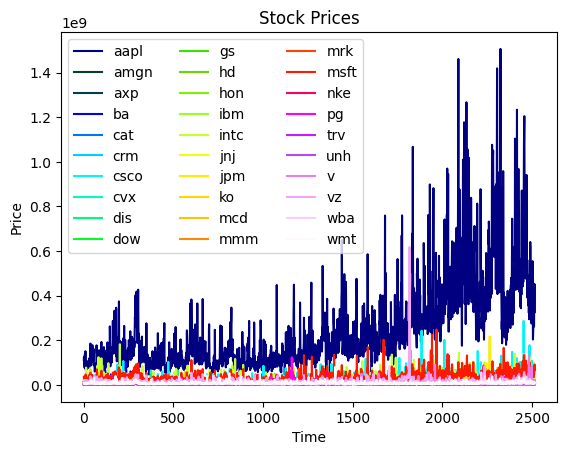

In [90]:
#Get a colormap
cmap = cm.get_cmap('gist_ncar', volData.shape[1])

for i in range(volData.shape[1]):
  plt.plot(volData.iloc[:,i], color = cmap(i))
  plt.title("Stock Prices")
  plt.xlabel("Time")
  plt.ylabel("Price")
  plt.legend(tickers, loc = "upper left", ncol = 3)



Figure 1: Here is a plot featuring all of our time series. It is impossible to make accurate sense of this plot with the data scaled in this manner. Some adjustments are needed.

scale the time series appropriately
hint: use Standard Scaler to save the mean and standard deviation of each time series, that way you can apply them later to your predicted results

In [98]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(volData)
print(scaler.mean_)


[2.41918808e+08 3.68032742e+06 4.82569939e+06 7.31825091e+06
 5.49183710e+06 6.39931196e+06 3.04478866e+07 7.59459024e+06
 9.22106420e+06 1.08550771e+06 3.69958000e+06 6.13210239e+06
 3.20954830e+06 4.64859694e+06 3.23061745e+07 8.38605635e+06
 1.95325344e+07 1.44888552e+07 4.83503569e+06 2.70803716e+06
 1.16112013e+07 3.61821291e+07 8.38845291e+06 9.05137382e+06
 2.00906164e+06 4.47784854e+06 1.07715065e+07 1.57255425e+07
 6.22716013e+06 8.56753041e+06]


In [95]:
scaled_data.mean(axis=0)

array([-8.11927808e-17, -1.40675318e-16, -7.37795269e-17, -6.17793222e-16,
        6.54484416e-16,  1.76693583e-16,  4.60151260e-16, -1.26819594e-16,
       -5.30621299e-17, -5.90240628e-15, -3.49481970e-16,  1.21303780e-16,
       -1.71652129e-17,  5.95376954e-17,  8.87031130e-16, -9.35923305e-17,
       -7.30382015e-16,  1.41006267e-16,  4.82071104e-16,  2.75360462e-16,
        1.46464165e-16,  7.58975995e-18, -1.22142183e-16,  1.21436159e-16,
        6.52366343e-16,  2.69524731e-16, -3.90784384e-16,  4.83185299e-17,
       -1.01099353e-16, -2.98350375e-17])

In [96]:
scaled_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

split traiing and testimg data

In [100]:
X = scaled_data
y = scaled_data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1509, 30), (1007, 30), (1509, 30), (1007, 30))

build the model. It shoudl be a MLP (Multi Layer Perceptron) thus the only kind of layers you need are Dense layers (`from keras.layers import Dense`). Keep in mind the size of the initial time series. By definition a autoencoder will start with large layers, shdink the number of neurons in each layer progressively till a "bottle neck" layer (e.g. 32 neurons, but try what works). then add progressively larger layers until the last layer has the same size as the imput data. Use `relu` activation functions for all layers but the last one, which shoudl be `linear`

In [ ]:
input_size = scaled_data.shape[1]
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(input_size,)))
....

In [ ]:
# this is a call back that ensures you stop training when the validation loss stops improving (es)
# ad saves the model if it is better than the model at the previous training epoch (mc)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


write the `model.compile` command passing to the compile function the `adam` optimizer and `mean_squared_error` loss function

```model.compile(...```


In [ ]:
model.compile(...

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 512)            │     1,288,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2516)           │     1,290,708 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,731,892 (10.42 MB)

 Trainable params: 2,731,892 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

write the model.fit command. This will start the training of the neural network.
pass to the fit() function the following arguments:
- the imput data: that is your data train pd.array
- the desired output.... pay attention! this is an autoencoder so it should reproduce with fidelity the input data!
- create an internal validation set: this will split the training data so that at each epoch you can assess the model performance on unseen data `validation_split=0.1`
- set up training for 200 epochs with the `epoch=200` argument
- set the `batch_size`. I set it to 10, you can try different things. Larger batch makes a faster code the has higher risk of overfitting
- set `verbose=1`
- add the callbacks with `callbacks=[es, mc]


```training = model.fit(.....```



In [ ]:
#remove
training = model.fit(.....

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9975
Epoch 1: val_loss improved from inf to 0.77445, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - loss: 0.9860 - val_loss: 0.7745
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.7302 
Epoch 2: val_loss improved from 0.77445 to 0.75359, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.7277 - val_loss: 0.7536
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.7082 
Epoch 3: val_loss improved from 0.75359 to 0.71910, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.7045 - val_loss: 0.7191
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6625 
Epoch 4: val_loss improved from 0.71910 to 0.69743, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.6633 - val_loss: 0.6974
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6503
Epoch 5: val_loss improved from 0.69743 to 0.68618, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.6519 - val_loss: 0.6862
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6431 
Epoch 6: val_loss improved from 0.68618 to 0.67942, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.6444 - val_loss: 0.6794
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6427
Epoch 7: val_loss improved from 0.67942 to 0.67934, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.6433 - val_loss: 0.6793
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6443 
Epoch 8: val_loss did not improve from 0.67934
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.6449 - val_loss: 0.6823
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6608
Epoch 9: val_loss did not improve from 0.67934
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.6579 - val_loss: 0.6816
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6286
Epoch 10: val_loss improved from 0.67934 to 0.67792, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.6328 - val_loss: 0.6779
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6229
Epoch 11: val_loss improved from 0.67792 to 0.67629, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.6278 - val_loss: 0.6763
Epoch 12/200
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5993
Epoch 12: val_loss did not improve from 0.67629
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6315 - val_loss: 0.6774
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6447
Epoch 13: val_loss did not improve from 0.67629
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6436 - val_loss: 0.6789
Epoch 14/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6316 
Epoch 14: val_loss improved from 0.67629 to 0.67287, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.6343 - val_loss: 0.6729
Epoch 15/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6409 
Epoch 15: val_loss improved from 0.67287 to 0.66758, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.6397 - val_loss: 0.6676
Epoch 16/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6369
Epoch 16: val_loss did not improve from 0.66758
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.6374 - val_loss: 0.6677
Epoch 17/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6296
Epoch 17: val_loss did not improve from 0.66758
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.6321 - val_loss: 0.6711
Epoch 18/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6429 
Epoch 18: val_loss did not improve from 0.66758
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6425 - val_loss: 0.6759
Epoch 19/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6393
Epoch 19: val_loss did not improve from 0.66758
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.6396 - val_loss: 0.6751
Epoch 20/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6288
Epoch 20: val_loss did not improve from 0.66758
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6307 - val_loss: 0.6

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.6265 - val_loss: 0.6671
Epoch 22/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.6266
Epoch 22: val_loss did not improve from 0.66709
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6272 - val_loss: 0.6704
Epoch 23/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6261
Epoch 23: val_loss did not improve from 0.66709
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.6277 - val_loss: 0.6721
Epoch 24/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6424
Epoch 24: val_loss did not improve from 0.66709
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6400 - val_loss: 0.6672
Epoch 25/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6390 
Epoch 25: val_loss did not improve from 0.66709
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6362 - val_loss: 0.6672
Epoch 26/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6142
Epoch 26: val_loss did not improve from 0.66709
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6177 - val_loss: 0.6

In [ ]:
training.history.keys() # this stores the value of the loss at each epoch so you can plot it

dict_keys(['loss', 'val_loss'])

In [ ]:
plot the loss function!!

In [ ]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss']);
# add axis labels and legend!!

CAPTION!!

plot (visualize) the prediction and the ground truth for the test data. What do you see? where is the model succesful where is it not?

In [ ]:
for i,_ in enumerate(X_test):
  ......

CAPTION!!